# Trabajo Final | Aprendizaje Estadístico y Computacional
---
### Luciano Davico
### Richard Orellana

---

Para el trabajo, utilizaremos una base de datos de accidentes de tránsito obtenida desde el sitio https://catalog.data.gov/dataset. En particular, referentes a choques de automóviles, en el cual se modelará como variable respuesta la ocurrencia binaria de si ocurre un deceso dado el choque y se generarán columnas aptas para poder modelar el problema de clasificación.

### Importamos los datos

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', sep=',', on_bad_lines='skip')
df.head()

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_82112/3605706702.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', sep=',', on_bad_lines='skip')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029437 entries, 0 to 2029436
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

### Preprocesamiento de los datos

Podemos ver que tenemos ciertas columnas referentes a fechas y ubicaciones en Estados Unidos, las cuales por simplicidad y por que no contamos con información que nos permita interpretar de buena manera estas variables, no las consideraremos.

In [6]:
location_time_columns_to_drop = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION']
df = df.drop(columns=location_time_columns_to_drop)
df.head()

,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


Dadas las columnas que tenemos, podemos generar features que podrían tener relevancia semántica para el modelo y que sean más ajustables a un problema de clasificación.

En primer lugar, crearemos nuestro **target** llamado `tragedy`, el cual tendrá el valor 1 si existe una o más personas que murieron a causa del accidente y 0 si no hubo muertos. Para esto, consideraremos la variable `NUMBER OF PERSONS KILLED`

In [7]:
killed_df = df[df['NUMBER OF PERSONS KILLED'] > 0]
print('Total accidents with people killed: ', len(killed_df))
killed_df.head()


Total accidents with people killed:  2834


,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
39,ELIOT AVENUE,NaN,NaN,0.0,1.0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,4456659,Bus,NaN,NaN,NaN,NaN
148,JEROME AVENUE,NaN,NaN,0.0,1.0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,4487210,Taxi,NaN,NaN,NaN,NaN
591,4 AVENUE,FOREST PLACE,NaN,0.0,1.0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,4408063,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
605,Trans- Manhattan Expressway,Amsterdam Avenue,NaN,4.0,1.0,0,0,0,0,4,...,NaN,NaN,NaN,NaN,4407693,Sedan,NaN,NaN,NaN,NaN
1320,AMSTERDAM AVENUE,NaN,NaN,0.0,1.0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,4408062,E-Bike,NaN,NaN,NaN,NaN


Chequeamos que exista consistencia entre las columnas de personas muertas y el desglose por peatones, ciclistas y motoristas.

In [8]:
non_consistent_data = 0
for row in killed_df.iterrows():
    deaths = row[1]['NUMBER OF PERSONS KILLED']
    deaths_pedestrians = row[1]['NUMBER OF PEDESTRIANS KILLED']
    deaths_cyclists = row[1]['NUMBER OF CYCLIST KILLED']
    deaths_motorists = row[1]['NUMBER OF MOTORIST KILLED']
    deaths_count = deaths_pedestrians + deaths_cyclists + deaths_motorists

    # chequeamos consistencia
    if deaths != deaths_count:
        non_consistent_data += 1
        if deaths > deaths_count:
            print(f'More deaths than deaths_count: {deaths} vs {deaths_count}')
        else:
            print(f'More deaths_count than deaths: {deaths} vs {deaths_count}')

non_consistent_data

More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0
More deaths than deaths_count: 1.0 vs 0


49

Podemos ver que de los 2029436 datos de muertes por choque, en solo 49 casos difiere la cantidad de muertes totales vs la suma de muertes por peatones, ciclistas y motorizados. Esto puede deberse a que hayan muerto personas que no estén dentro de estas tres categorías lo cual es perfectamente posible, además que vemos que en cada uno de estos casos la diferencia solo es 1 vs 0. En dicho caso, nos quedamos con la columna `NUMBER OF PERSONS KILLED` y eliminamos las demás.

In [9]:
columns_killed_to_drop = ['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']
df = df.drop(columns=columns_killed_to_drop)

In [10]:
df['tragedy'] = df['NUMBER OF PERSONS KILLED'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
df.groupby('tragedy')['tragedy'].count()

tragedy
0    2026603
1       2834
Name: tragedy, dtype: int64

In [12]:
df = df.drop(columns='NUMBER OF PERSONS KILLED')

In [13]:
df.head()

,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,tragedy
0,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0,0,2,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,0
1,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0,0,1,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,0
2,THROGS NECK BRIDGE,NaN,NaN,0.0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,0
3,NaN,NaN,1211 LORING AVENUE,0.0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,0
4,SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,0


Ahora analizaremos incluir variable predictoras binarias acerca de si el choque se realizó en una calle relacionada con una avenida o no. Será 1 si hay una avenida involucrada y 0 en otro caso, por lo que observaremos las columnas `ON STREET NAME`, `CROSS STREET NAME`, `OFF STREET NAME`.

In [14]:
def is_avenue(data):

    if data is np.nan:
        return 0

    if 'avenue' in data.lower():
        return 1
    else:
        return 0

df['on_street_avenue'] = df['ON STREET NAME'].apply(is_avenue)
df['cross_street_avenue'] = df['CROSS STREET NAME'].apply(is_avenue)
df['off_street_avenue'] = df['OFF STREET NAME'].apply(is_avenue)

Procedemos a borrar las columnas 'crudas'.

In [15]:
street_columns_to_drop = ['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME']
df = df.drop(columns=street_columns_to_drop)
df.head()

,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue
0,2.0,0,0,2,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,0,0,1,0
1,1.0,0,0,1,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,0,0,0,0
2,0.0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,0,0,0,0
3,0.0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,0,0,0,1
4,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,0,1,0,0


Para efectos de no perder información al agregar columnas, verificaremos que exista cierta consistencia entre el total de personas heridas vs el desglose y, en tal caso, procederemos a mantener las columnas `NUMBER OF PEDESTRIANS INJURED`, `NUMBER OF CYCLIST INJURED`, `NUMBER OF MOTORIST INJURED` en desmedro de `NUMBER OF PERSONS INJURED`

In [16]:
injured_diff = 0
for row in df.iterrows():
    injureds = row[1]['NUMBER OF PERSONS INJURED']
    injured_pedestrians = row[1]['NUMBER OF PEDESTRIANS INJURED']
    injured_cyclists = row[1]['NUMBER OF CYCLIST INJURED']
    injured_motorists = row[1]['NUMBER OF MOTORIST INJURED']
    injured_count = injured_pedestrians + injured_cyclists + injured_motorists

    # chequeamos consistencia
    if injureds != injured_count:
        injured_diff += 1

injured_diff

6782

Vemos que hay consistencia en más del 99% de los casos entre las 3 variables y la variable agregada, por lo que mantendremos las variables desagregadas por las diferentes personas.

In [17]:
df = df.drop(columns='NUMBER OF PERSONS INJURED')
df.head()

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue
0,0,0,2,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,0,0,1,0
1,0,0,1,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,0,0,0,0
2,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,0,0,0,0
3,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,0,0,0,1
4,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,0,1,0,0


Procedemos a borrar la columna `COLLISION_ID` dado que no aporta información relevante.

In [18]:
len(df)

2029437

In [19]:
df = df.drop(columns='COLLISION_ID')

Tenemos variables categóricas relacionadas al factor de contribución del vehículo y el tipo de vehículo. En particular, los datos de tipo de vehículo podemos reclasificarlos en menos categorías y limpiarlos, ya que el modelo podría interpretarlos diferentes por ser strings diferentes, siendo que semánticamente podrían significar los mismo.

Vemos las categorías con las que contamos en `VEHICLE TYPE CODE 1`

In [20]:
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].str.lower()
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].str.lower()
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].str.lower()
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].str.lower()
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].str.lower()

In [21]:
grouped_vehicle_type_df = df.groupby('VEHICLE TYPE CODE 1')[['VEHICLE TYPE CODE 1']].count()
grouped_vehicle_type_df = grouped_vehicle_type_df.rename(columns={'VEHICLE TYPE CODE 1': 'count'})
grouped_vehicle_type_df = grouped_vehicle_type_df.reset_index()

In [22]:
grouped_vehicle_type_df.sort_values(by='count', ascending=False)

,VEHICLE TYPE CODE 1,count
828,sedan,555746
879,station wagon/sport utility vehicle,437437
706,passenger vehicle,416206
865,sport utility / station wagon,180291
909,taxi,82156
...,...,...
454,gas powere,1
457,gator 4x4,1
458,ge/sc,1
459,geico,1


In [23]:
grouped_vehicle_type_df['VEHICLE TYPE CODE 1'].unique().tolist()

["''lime mope",
 '.',
 '0',
 '1',
 '100th truc',
 '11-va',
 '11111',
 '12 pa',
 '12 passage',
 '12 passeng',
 '15 pa',
 '18 wh',
 '18 wheeler',
 '197209',
 '1c',
 '1s',
 '2 doo',
 '2 dr',
 '2 dr sedan',
 '2 ton',
 '2 whe',
 '2 wheel sc',
 '2- to',
 '2000',
 '2015',
 '250-3',
 '26 ft',
 '3 doo',
 '3 whe',
 '3-door',
 '3-whe',
 '315 e',
 '35 ft',
 '3dc-',
 '3door',
 '4 axe',
 '4 dr sedan',
 '4 run',
 '4d',
 '4door',
 '4dr',
 '4ds',
 '4dsd',
 '4sedn',
 '4whee',
 '5',
 '50cc mini',
 '50cc scoot',
 '5x8 t',
 '7',
 '7532433',
 '985',
 '994',
 '997',
 '999',
 '9999',
 '99999',
 '?omme',
 'a',
 'a,n',
 'a-one',
 'abula',
 'abulance',
 'acces',
 'access-a-r',
 'aeria',
 'almbulance',
 'amabu',
 'amazon tru',
 'amb',
 'ambalance',
 'ambu',
 'ambukance',
 'ambul',
 'ambulace',
 'ambulance',
 'ambulane',
 'ambulanve',
 'ambulence',
 'ambulette',
 'amdu',
 'amubulance',
 'amulance',
 'aport',
 'app',
 'appor',
 'armor',
 'armored truck',
 'army',
 'asphalt ro',
 'attac',
 'atv p',
 'back',
 'back h

Vemos que ciertas palabras se repiten, tales como 'truck', 'bike', 'scooter', por lo que mapearemos dichas variables en el dataset original.

In [24]:
def agg_vehicle_type(data):
    if data is np.nan:
        return np.nan

    if 'pickup' in data or 'pick up' in data or 'pick-up' in data:
        return 'pickup'
    elif 'garbage' in data:
        return 'truck'
    elif 'truck' in data:
        return 'truck'
    elif 'dump' in data:
        return 'truck'
    elif 'motorbike' in data:
        return 'motorcycle'
    elif 'motor cycle' in data or 'motorcycle' in data:
        return 'motorcycle'
    elif 'bike' in data:
        return 'bike'
    elif 'scooter' in data:
        return 'scooter'
    elif 'sedan' in data:
        return 'sedan'
    elif 'convertible' in data:
        return 'sedan'
    elif 'van' in data:
        return 'van'
    elif 'ambu' in data:
        return 'ambulance'
    else:
        return 'other'

    return data


df['vehicle_type_1'] = df['VEHICLE TYPE CODE 1'].apply(agg_vehicle_type)
df['vehicle_type_2'] = df['VEHICLE TYPE CODE 2'].apply(agg_vehicle_type)
df['vehicle_type_3'] = df['VEHICLE TYPE CODE 3'].apply(agg_vehicle_type)
df['vehicle_type_4'] = df['VEHICLE TYPE CODE 4'].apply(agg_vehicle_type)
df['vehicle_type_5'] = df['VEHICLE TYPE CODE 5'].apply(agg_vehicle_type)

In [25]:
grouped_vehicle_type_df = df.groupby('vehicle_type_1')[['vehicle_type_1']].count()
grouped_vehicle_type_df = grouped_vehicle_type_df.rename(columns={'vehicle_type_1': 'count'})
grouped_vehicle_type_df = grouped_vehicle_type_df.reset_index()
grouped_vehicle_type_df.sort_values(by='count', ascending=False)

,vehicle_type_1,count
3,other,1249624
6,sedan,602211
4,pickup,45248
7,truck,44545
8,van,35000
1,bike,17042
2,motorcycle,12421
0,ambulance,7608
5,scooter,2902


A modo de simplificar el problema, no consideraremos la columna `other`. Además, dejamos solo las columnas `vehicles_type_*`.

In [26]:
df = df[df['vehicle_type_1'] != 'other']

Verificamos la cantidad de ocurrencias de ambas clases

In [27]:
df.groupby('tragedy')['tragedy'].count()

tragedy
0    778499
1      1314
Name: tragedy, dtype: int64

In [28]:
(773978 - 1296) / 773978

0.9983255338007023

Tenemos alrededor de 99.8 % de los casos con la clase 0, por lo que más adelante tendremos que trabajar en alguna técnica que resuelva el problema.

In [29]:
vehicles_type_columns_to_drop = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
df = df.drop(columns=vehicles_type_columns_to_drop)
df.head()

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,0,0,2,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,0,0,1,0,sedan,sedan,NaN,NaN,NaN
1,0,0,1,Pavement Slippery,NaN,NaN,NaN,NaN,0,0,0,0,sedan,NaN,NaN,NaN,NaN
2,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,0,0,0,0,sedan,pickup,NaN,NaN,NaN
3,0,0,0,Unspecified,NaN,NaN,NaN,NaN,0,0,0,1,sedan,NaN,NaN,NaN,NaN
4,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0,NaN,NaN,NaN,NaN,NaN


Mostramos los tipos de auto de cada columna

In [30]:
vehicle_types = grouped_vehicle_type_df.vehicle_type_1.unique().tolist()
vehicle_types.remove('other')
vehicle_types

['ambulance',
 'bike',
 'motorcycle',
 'pickup',
 'scooter',
 'sedan',
 'truck',
 'van']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779813 entries, 0 to 2029436
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   NUMBER OF PEDESTRIANS INJURED  779813 non-null  int64 
 1   NUMBER OF CYCLIST INJURED      779813 non-null  int64 
 2   NUMBER OF MOTORIST INJURED     779813 non-null  int64 
 3   CONTRIBUTING FACTOR VEHICLE 1  775274 non-null  object
 4   CONTRIBUTING FACTOR VEHICLE 2  637560 non-null  object
 5   CONTRIBUTING FACTOR VEHICLE 3  57610 non-null   object
 6   CONTRIBUTING FACTOR VEHICLE 4  13693 non-null   object
 7   CONTRIBUTING FACTOR VEHICLE 5  3844 non-null    object
 8   tragedy                        779813 non-null  int64 
 9   on_street_avenue               779813 non-null  int64 
 10  cross_street_avenue            779813 non-null  int64 
 11  off_street_avenue              779813 non-null  int64 
 12  vehicle_type_1                 766977 non-n

Finalmente, realizamos un proceso similar con el factor de contribución.

Eliminamos los datos que no tengan factor de contribución 1.

In [32]:
df = df[~df['CONTRIBUTING FACTOR VEHICLE 1'].isnull()]

In [33]:
display(df['CONTRIBUTING FACTOR VEHICLE 1'].unique())
len(df['CONTRIBUTING FACTOR VEHICLE 1'].unique())

array(['Aggressive Driving/Road Rage', 'Pavement Slippery',
       'Following Too Closely', 'Unspecified', 'Passing Too Closely',
       'Driver Inexperience', 'Turning Improperly', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Steering Failure',
       'Driver Inattention/Distraction', 'Traffic Control Disregarded',
       'Unsafe Lane Changing', 'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Alcohol Involvement', 'Passing or Lane Usage Improper',
       'View Obstructed/Limited', 'Illnes',
       'Failure to Yield Right-of-Way', 'Glare', 'Passenger Distraction',
       'Backing Unsafely', 'Other Vehicular', 'Lost Consciousness',
       'Obstruction/Debris', 'Tinted Windows', 'Fell Asleep',
       'Pavement Defective', 'Other Lighting Defects', 'Brakes Defective',
       'Animals Action', 'Outside Car Distraction',
       'Driverless/Runaway Vehicle', 'Tire Failure/Inadequate',
       'Fatigued/Drowsy', 'Accelerator Defective',

61

Vemos que hay un cierto orden en los datos de factor de contribución, por lo que cambiaremos el nombre de las columnas a uno más sencillo

In [34]:
factor_mapper = {
    f'CONTRIBUTING FACTOR VEHICLE {i}': f'contribution_factor_vehicle_{i}' for i in range(1, 6)
}
df = df.rename(columns=factor_mapper)
df.head()

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,contribution_factor_vehicle_4,contribution_factor_vehicle_5,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5
0,0,0,2,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,0,0,1,0,sedan,sedan,NaN,NaN,NaN
1,0,0,1,Pavement Slippery,NaN,NaN,NaN,NaN,0,0,0,0,sedan,NaN,NaN,NaN,NaN
2,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,0,0,0,0,sedan,pickup,NaN,NaN,NaN
3,0,0,0,Unspecified,NaN,NaN,NaN,NaN,0,0,0,1,sedan,NaN,NaN,NaN,NaN
5,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,0,0,0,0,truck,sedan,NaN,NaN,NaN


Borramos algunas filas que pueden tener factores de contribución raros

In [35]:
df = df[(df.contribution_factor_vehicle_1 != '1') & (df.contribution_factor_vehicle_1 != '80') & (df.contribution_factor_vehicle_1 != 'Unspecified')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574841 entries, 0 to 2029432
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   NUMBER OF PEDESTRIANS INJURED  574841 non-null  int64 
 1   NUMBER OF CYCLIST INJURED      574841 non-null  int64 
 2   NUMBER OF MOTORIST INJURED     574841 non-null  int64 
 3   contribution_factor_vehicle_1  574841 non-null  object
 4   contribution_factor_vehicle_2  513354 non-null  object
 5   contribution_factor_vehicle_3  48960 non-null   object
 6   contribution_factor_vehicle_4  11866 non-null   object
 7   contribution_factor_vehicle_5  3363 non-null    object
 8   tragedy                        574841 non-null  int64 
 9   on_street_avenue               574841 non-null  int64 
 10  cross_street_avenue            574841 non-null  int64 
 11  off_street_avenue              574841 non-null  int64 
 12  vehicle_type_1                 568270 non-n

Eliminamos las columnas innecesarias y aquellas que tengan menos de 5% de los datos

In [36]:
threshold = round(len(df) * 0.05)
columns_to_drop = []
for col in df.columns.tolist():
    notnull_data = len(df[~df[col].isnull()])
    if threshold >= notnull_data:
        columns_to_drop.append(col)

print(f'Threshold: {threshold}')
columns_to_drop

Threshold: 28742


['contribution_factor_vehicle_4',
 'contribution_factor_vehicle_5',
 'vehicle_type_4',
 'vehicle_type_5']

Eliminamos dichas columnas. Se puede interpretar que menos del 5% de los accidentes ocurridos en USA involucran más de 3 vehículos.

In [37]:
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574841 entries, 0 to 2029432
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   NUMBER OF PEDESTRIANS INJURED  574841 non-null  int64 
 1   NUMBER OF CYCLIST INJURED      574841 non-null  int64 
 2   NUMBER OF MOTORIST INJURED     574841 non-null  int64 
 3   contribution_factor_vehicle_1  574841 non-null  object
 4   contribution_factor_vehicle_2  513354 non-null  object
 5   contribution_factor_vehicle_3  48960 non-null   object
 6   tragedy                        574841 non-null  int64 
 7   on_street_avenue               574841 non-null  int64 
 8   cross_street_avenue            574841 non-null  int64 
 9   off_street_avenue              574841 non-null  int64 
 10  vehicle_type_1                 568270 non-null  object
 11  vehicle_type_2                 467693 non-null  object
 12  vehicle_type_3                 45800 non-nu

Finalmente, renombramos ciertas columnas asociadas a las personas lesionadas y reordenamos las columnas

In [38]:
new_column_names = {
    'NUMBER OF PEDESTRIANS INJURED': 'pedestrians_injured',
    'NUMBER OF CYCLIST INJURED': 'cyclists_injured',
    'NUMBER OF MOTORIST INJURED': 'motorists_injured'
}
df = df.rename(columns=new_column_names)

In [39]:
df.head()

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3
0,0,0,2,Aggressive Driving/Road Rage,Unspecified,NaN,0,0,1,0,sedan,sedan,NaN
1,0,0,1,Pavement Slippery,NaN,NaN,0,0,0,0,sedan,NaN,NaN
2,0,0,0,Following Too Closely,Unspecified,NaN,0,0,0,0,sedan,pickup,NaN
6,0,0,0,Passing Too Closely,Unspecified,NaN,0,0,0,0,sedan,truck,NaN
8,0,0,0,Driver Inexperience,Unspecified,NaN,0,0,0,1,sedan,NaN,NaN


Ahora debemos reemplazar los NaN por algún valor, en el caso de las variables categóricas. Para esto, utilizaremos la moda como medida de reemplazo

In [40]:
categorical_features = [
    'contribution_factor_vehicle_1',
    'contribution_factor_vehicle_2',
    'contribution_factor_vehicle_3',
    'vehicle_type_1',
    'vehicle_type_2',
    'vehicle_type_3']

for f in categorical_features:
    mode = df[f].mode()[0]
    df[f] = df[f].fillna(mode)

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574841 entries, 0 to 2029432
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   pedestrians_injured            574841 non-null  int64 
 1   cyclists_injured               574841 non-null  int64 
 2   motorists_injured              574841 non-null  int64 
 3   contribution_factor_vehicle_1  574841 non-null  object
 4   contribution_factor_vehicle_2  574841 non-null  object
 5   contribution_factor_vehicle_3  574841 non-null  object
 6   tragedy                        574841 non-null  int64 
 7   on_street_avenue               574841 non-null  int64 
 8   cross_street_avenue            574841 non-null  int64 
 9   off_street_avenue              574841 non-null  int64 
 10  vehicle_type_1                 574841 non-null  object
 11  vehicle_type_2                 574841 non-null  object
 12  vehicle_type_3                 574841 non-n

None

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3
0,0,0,2,Aggressive Driving/Road Rage,Unspecified,Unspecified,0,0,1,0,sedan,sedan,sedan
1,0,0,1,Pavement Slippery,Unspecified,Unspecified,0,0,0,0,sedan,sedan,sedan
2,0,0,0,Following Too Closely,Unspecified,Unspecified,0,0,0,0,sedan,pickup,sedan
6,0,0,0,Passing Too Closely,Unspecified,Unspecified,0,0,0,0,sedan,truck,sedan
8,0,0,0,Driver Inexperience,Unspecified,Unspecified,0,0,0,1,sedan,sedan,sedan


Ahora, para poder utilizar nuestras variables en el modelo, utilizaremos LabelEncoder de scikit-learn a modo de tratar numéricamente las variables categóricas.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)
df.head()

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3
0,0,0,2,1,55,42,0,0,1,0,5,6,6
1,0,0,1,37,55,42,0,0,0,0,5,6,6
2,0,0,0,19,55,42,0,0,0,0,5,4,6
6,0,0,0,34,55,42,0,0,0,0,5,7,6
8,0,0,0,10,55,42,0,0,0,1,5,6,6


Tenemos nuestro dataset final limpio, por lo que estamos listos para comenzar con el entrenamiento

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574841 entries, 0 to 2029432
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   pedestrians_injured            574841 non-null  int64
 1   cyclists_injured               574841 non-null  int64
 2   motorists_injured              574841 non-null  int64
 3   contribution_factor_vehicle_1  574841 non-null  int64
 4   contribution_factor_vehicle_2  574841 non-null  int64
 5   contribution_factor_vehicle_3  574841 non-null  int64
 6   tragedy                        574841 non-null  int64
 7   on_street_avenue               574841 non-null  int64
 8   cross_street_avenue            574841 non-null  int64
 9   off_street_avenue              574841 non-null  int64
 10  vehicle_type_1                 574841 non-null  int64
 11  vehicle_type_2                 574841 non-null  int64
 12  vehicle_type_3                 574841 non-null  int64
dty

# Respuesta 1: Análisis exploratorio de datos con indicadores, tablas y gráficas apropiadas

### Análisis descriptivo de variables

# 1. Resumen Estadístico Para cada variable imprimimos su descripción para obtener sus estadísticos más relevantes

Para este análisis utilizaremos las features numéricas del dataset.

In [42]:
numerical_features = ['pedestrians_injured', 'cyclists_injured', 'motorists_injured', 'on_street_avenue', 'cross_street_avenue', 'off_street_avenue']
numeric_df = df[numerical_features]
numeric_df.describe()

,pedestrians_injured,cyclists_injured,motorists_injured,on_street_avenue,cross_street_avenue,off_street_avenue
count,574841.000000,574841.000000,574841.000000,574841.000000,574841.000000,574841.000000
mean,0.051266,0.037005,0.261032,0.268706,0.213189,0.086984
std,0.235863,0.191755,0.688802,0.443287,0.409561,0.281812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,27.000000,3.000000,21.000000,1.000000,1.000000,1.000000


# 2. Visualizaciones

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

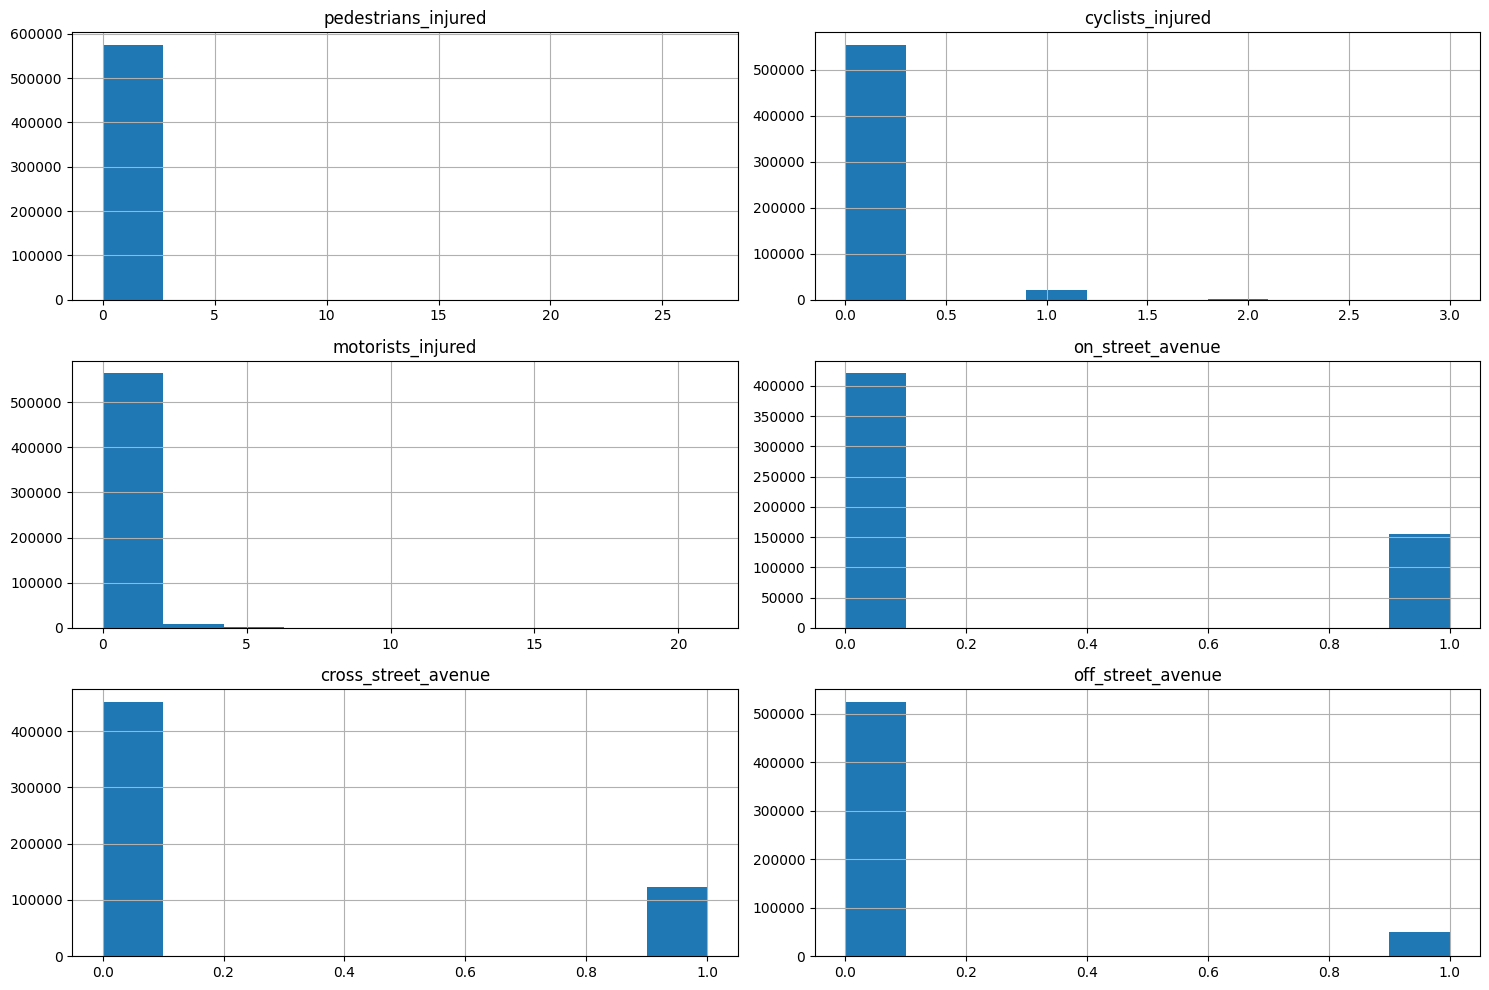

In [45]:
# Histogramas para variables numéricas
numeric_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

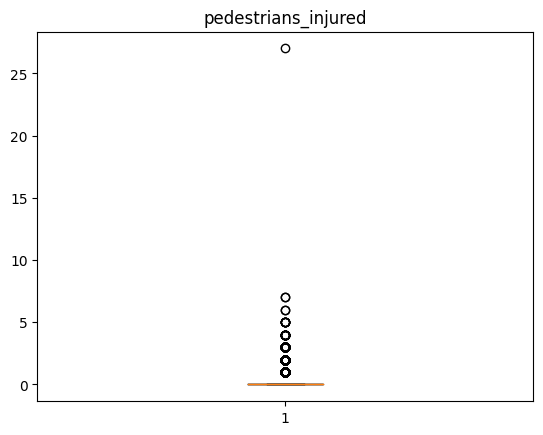

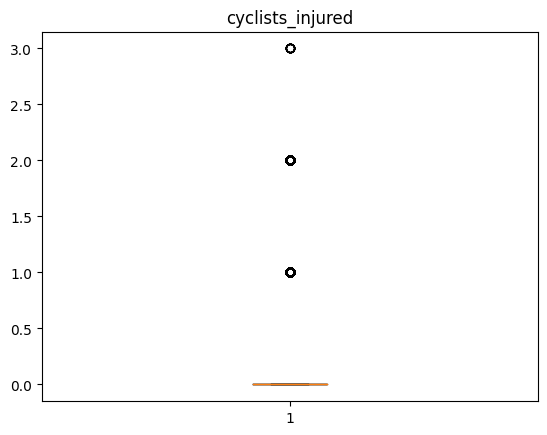

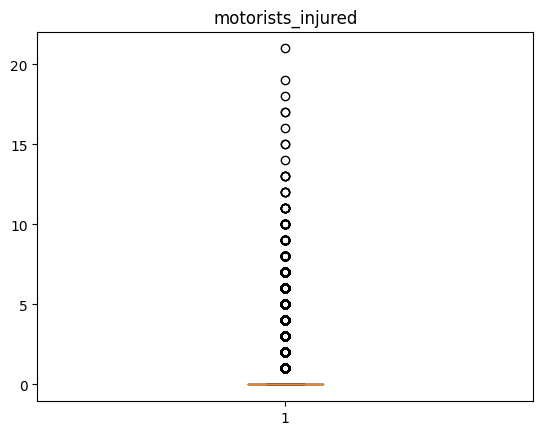

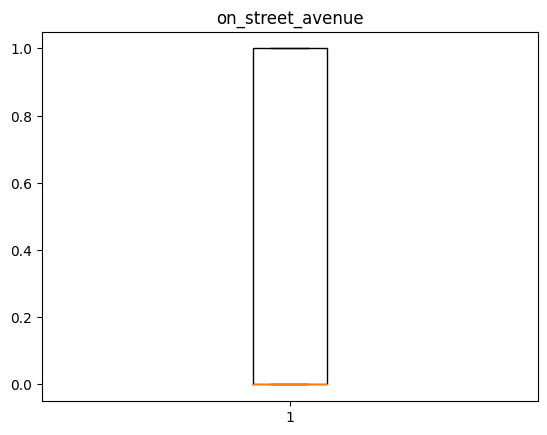

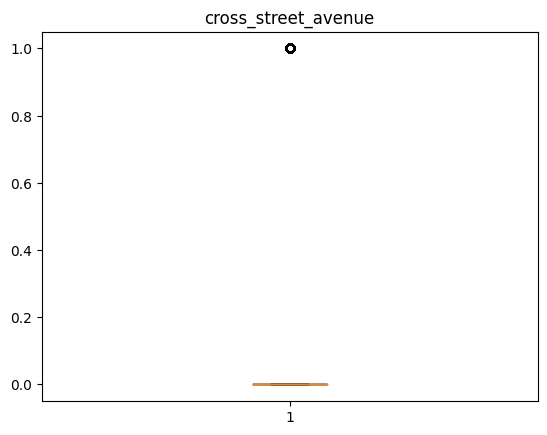

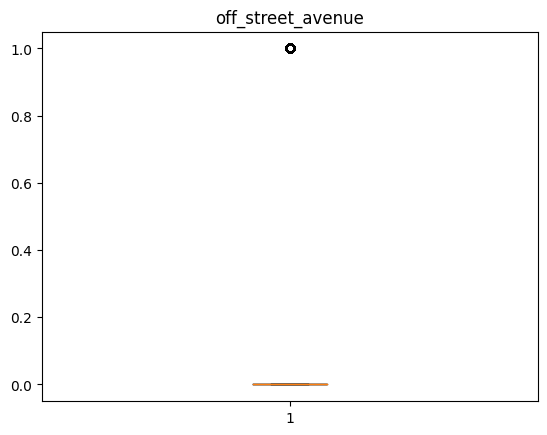

In [55]:
# Identificación de valores atípicos (usando boxplots como ejemplo)
numeric_columns = numeric_df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.boxplot(numeric_df[column].dropna())
    plt.title(column)
    plt.show()

Vemos que existe una gran cantidad de outliers, además de que la mayoría de las columnas son datos binarios, por lo que el boxplot no es la alternativa más idónea para ver distribuciones de los datos.

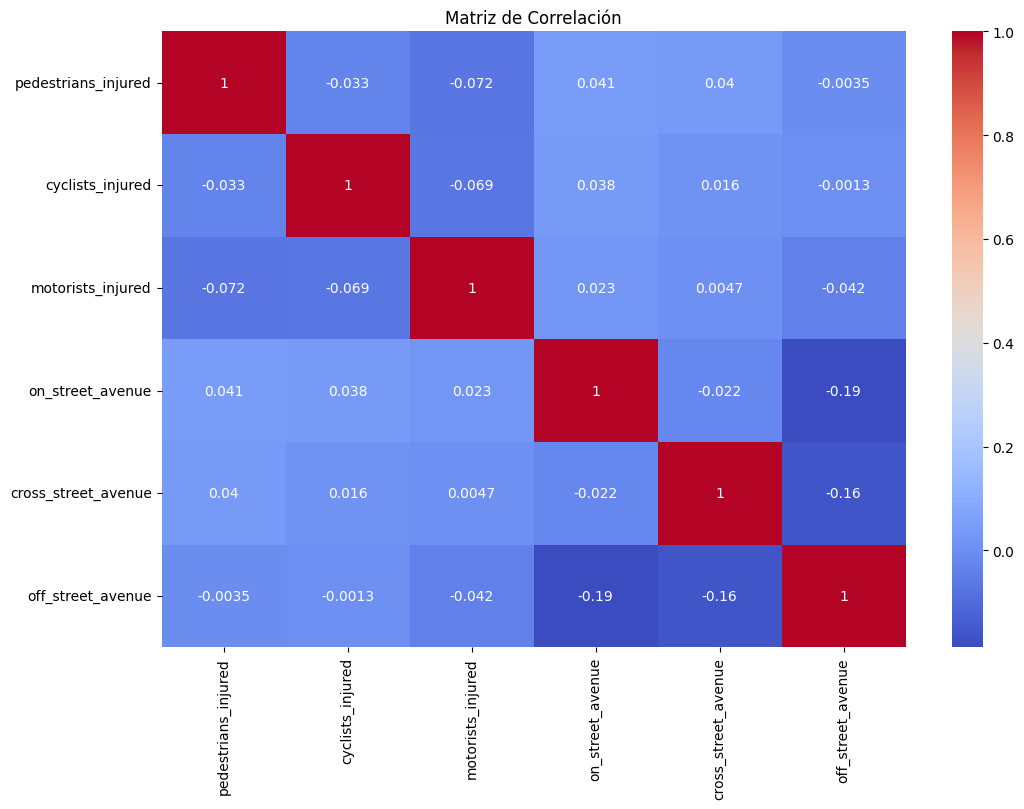

In [58]:
# 5. Matriz de correlación
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

### Descomposición de dataset en entrenamiento y test

Dividiremos el dataset en una proporción 70:30

In [62]:
target = "tragedy"

X_columns = df.columns.tolist()
X_columns.remove(target)

X = df[X_columns]
y = df[target]

In [63]:
X.head()

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3
0,0,0,2,1,55,42,0,1,0,5,6,6
1,0,0,1,37,55,42,0,0,0,5,6,6
2,0,0,0,19,55,42,0,0,0,5,4,6
6,0,0,0,34,55,42,0,0,0,5,7,6
8,0,0,0,10,55,42,0,0,1,5,6,6


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,tragedy
562150,0,0,0,51,55,42,1,0,0,5,6,6,0
1074557,0,0,0,4,21,42,0,0,0,5,6,6,0
685541,0,0,0,52,55,42,1,0,0,5,3,6,0
592102,1,0,0,9,55,42,0,0,0,5,6,6,0
917760,0,0,0,36,55,42,0,0,0,5,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861874,0,0,0,34,55,42,0,0,0,5,3,6,0
1123155,0,0,1,53,55,42,1,0,0,5,3,6,0
1080254,0,0,1,34,55,42,0,0,0,5,6,6,0
1124246,0,0,0,35,55,42,0,1,0,5,4,6,0


Vemos la proporción de cada clase en el dataset de entrenamiento. Notar que estamos ante un caso de alto desbalance de los datos

In [65]:
train_df.groupby(target)[target].count()

tragedy
0    401696
1       692
Name: tragedy, dtype: int64

# Respuesta 2 : Aplicar apropiadamente técnicas del aprendizaje supervisado y seleccionar el mejor modelo posible

### Medidas de desempeño a utilizar

Modelos de lenguaje supervisado a implementar

Primero, señalar que las técnicas que más se utilizan para el tipo de problema que abordamos "clasificación" son las siguientes:
Para problemas de clasificación, las técnicas más apropiadas y comúnmente utilizadas son:

-Regresión logística
-Máquinas de vectores de soporte (SVM)
-Árboles de decisión
-Bosques aleatorios (Random Forests)
-Gradient Boosting Machines (GBM)
-Redes neuronales
-k-Vecinos más cercanos (k-NN)
-Naive Bayes
-Árboles de decisión con potenciación (AdaBoost)
-Redes neuronales convolucionales (específicamente para datos de imagen).








# Justificación

Dado que estamos ante un problema de clasificación binaria con alta cantidad de datos, podemos ocupar un **Random Forest**, dado que ante escenarios de alta masa de datos tiende a ser de los mejores clasificadores y altamente eficiente. Por otro lado, también utilizaremos **Naive Bayes**, dado que si observamos las covariables predictoras, podríamos asumir que cada una de ellas puede ser independiente, lo cual es uno de los supuestos básicos en Naive Bayes. En tercer lugar utilizaremos **máquinas de vectores de soporte**, dado su flexibilidad para poder ser aplicado bajo un escenario de kernel lineal o no lineal, dependiendo de cómo distribuyan los datos. Por último, utilizaremos un **Árbol de Clasificación** para compararlo con los otros modelos y así chequear si tiene un poder predictivo similar, en cuyo caso preferiríamos utilizar como modelo final el Árbol de Clasificación dada su practicidad al ser fácilmente interpretable.

### Implementación de modelos, resultados y elección de justificación.

Para la implementación de cada modelo, se utilizará Cross Validation con 10 particiones de los datos a modo de obtener una buena generalización. Probablemente los primeros resultados que veremos tendrán un alto accuracy y muy bajo f1-score. Sin embargo, utilizaremos algún tratamiento de la probabilidad de corte para mejorar la clasificación de la clase minoritaria.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

In [67]:
def cross_validation(estimator, X, y, scoring_metric, K=10):
    score = cross_val_score(estimator=estimator, X=X, y=y, cv=K, scoring=scoring_metric)
    return np.mean(score)

Definimos los modelos

In [68]:
clf_svm_l = SVC(kernel='linear', C=1, probability=True)
clf_svm_g = SVC(kernel='sigmoid', C=1, probability=True)
clf_nb = GaussianNB()
clf_rf = RandomForestClassifier(n_estimators=100)
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [69]:
score_metric = 'f1' # F1-Score
K = 10

Realizamos CV para `F1-score`

**Precaución: puede demorarse un poco esta celda**

In [95]:
clfs = {
    clf_svm_l: cross_validation(clf_svm_l, X_train, y_train, score_metric, K),
    clf_svm_g: cross_validation(clf_svm_g, X_train, y_train, score_metric, K),
    clf_nb: cross_validation(clf_nb, X_train, y_train, score_metric, K),
    clf_rf: cross_validation(clf_rf, X_train, y_train, score_metric, K),
    clf_tree: cross_validation(clf_tree, X_train, y_train, score_metric, K)
}
clfs

KeyboardInterrupt: ignored

CV para `Accuracy`

In [ ]:
clfs = {
    clf_svm_l: cross_validation(clf_svm_l, X_train, y_train, 'accuracy', K),
    clf_svm_g: cross_validation(clf_svm_g, X_train, y_train, 'accuracy', K),
    clf_nb: cross_validation(clf_nb, X_train, y_train, 'accuracy', K),
    clf_rf: cross_validation(clf_rf, X_train, y_train, 'accuracy', K),
    clf_tree: cross_validation(clf_tree, X_train, y_train, 'accuracy', K)
}
clfs

#### Resolución del desbalance de clases

Hemos visto en los resultados anteriores que los datos de `F1-Score` han sido muy bajos, cercanos a 0. Por otra parte, si observamos el `Accuracy`, es muy cercano a 1. En dicho caso estamos ante un clásico escenario de clases desbalanceadas cuyo problema radica en que el modelo generaliza muy bien para la clase mayoritaria y tiende a clasificar como la clase mayoritaria, aquella clase minoritaria. El desafío es que el modelo logre generalizar para ambas clases.

Dicho lo anterior, respecto al gran desbalance entre la clase negativa y positiva tendremos que considerar aplicar un cambio en la probabilidad de corte, undersampling u oversampling. El método que probaremos es la modificación de la probabilidad de corte, por lo que probaremos diferentes clasificaciones basados en diferentes probabilidades de corte y luego utilizaremos aquella para ajustar los modelos.

Al mismo tiempo, probaremos realizar una optimización de hiperparámetros para ajustar dichos modelos a una capacidad de generalización óptima tanto en el entrenamiento como la inferencia, evitando caer en sobre o subajuste.

##### Optimización de hiperparámetros y Probabilidad de corte en Random Forest

Calculamos la probabilidad de corte

In [70]:
def probability_threshold(clf, X, y, scale=0.05, iters=10):
    thresholds = []
    for i in range(iters):
        thld = scale + (scale * i)  # 0.05, 0.1, 0.15, 0.2, ...., 0.5

        y_pred = (clf.predict_proba(X)[:,1] >= thld).astype(int)
        score = f1_score(y, y_pred)

        # Save the data
        thresholds.append((thld, score))

    return thresholds

##### Entrenamos los modelos

In [71]:
clf_rf.fit(X_train, y_train)
clf_nb.fit(X_train, y_train)
clf_svm_l.fit(X_train, y_train)
clf_svm_g.fit(X_train, y_train)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Calculamos los puntos de corte y el valor de la métrica

In [72]:
thrld_rf = probability_threshold(clf_rf, X_train, y_train, 0.05, 10)
thrld_nb = probability_threshold(clf_nb, X_train, y_train, 0.05, 20)
thrld_svm_l = probability_threshold(clf_svm_l, X_train, y_train, 0.05, 10)
thrld_svm_g = probability_threshold(clf_svm_g, X_train, y_train, 0.05, 10)
thrld_tree = probability_threshold(clf_tree, X_train, y_train, 0.05, 10)

Graficamos los puntos de corte para cada modelo

In [73]:
thrld_rf_df = pd.DataFrame(thrld_rf, columns=['Threshold', 'F1-Score'])
thrld_nb_df = pd.DataFrame(thrld_nb, columns=['Threshold', 'F1-Score'])
thrld_svm_l_df = pd.DataFrame(thrld_svm_l, columns=['Threshold', 'F1-Score'])
thrld_svm_g_df = pd.DataFrame(thrld_svm_g, columns=['Threshold', 'F1-Score'])
thrld_tree_df = pd.DataFrame(thrld_tree, columns=['Threshold', 'F1-Score'])

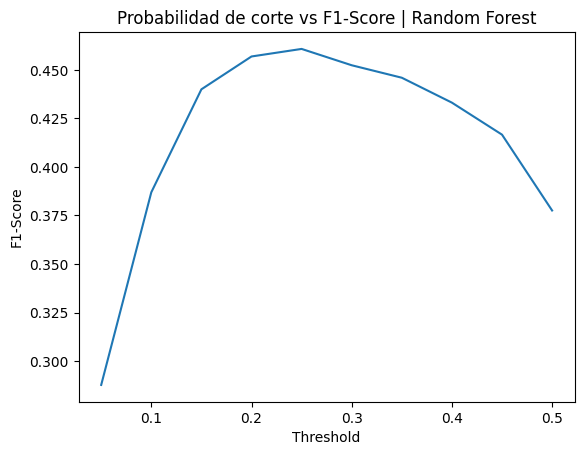

In [74]:
# Random Forest
ax = sns.lineplot(thrld_rf_df, x='Threshold', y='F1-Score')
plt.title('Probabilidad de corte vs F1-Score | Random Forest')
plt.show()

In [75]:
threshold_rf = 0.25

Podemos ver que el punto óptimo de probabilidad de corte en `Random Forest` es de `0.25`, llegando a un `F1-Score` similar a `0.5`

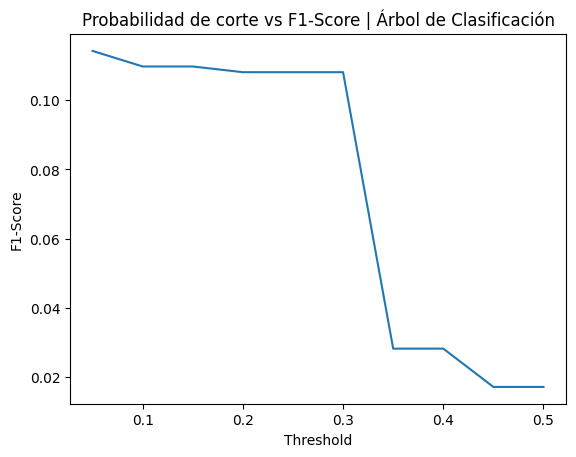

In [76]:
# Decission Tree Classifier
ax = sns.lineplot(thrld_tree_df, x='Threshold', y='F1-Score')
plt.title('Probabilidad de corte vs F1-Score | Árbol de Clasificación')
plt.show()

Podemos ver que el punto óptimo de probabilidad de corte en `Decission Tree Classifier` es de `0.15`, llegando a un `F1-Score` similar a `0.11`

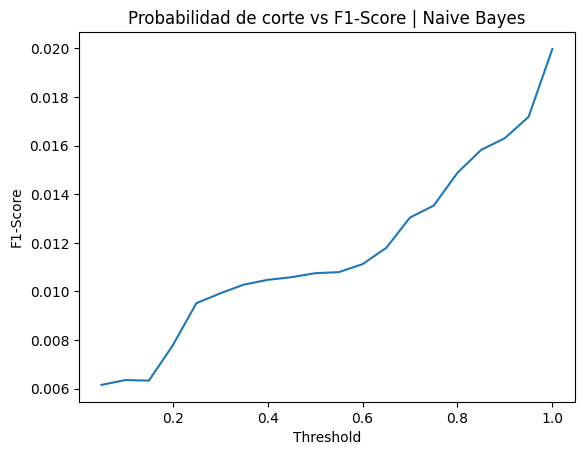

In [77]:
# Naive Bayes
ax = sns.lineplot(thrld_nb_df, x='Threshold', y='F1-Score')
plt.title('Probabilidad de corte vs F1-Score | Naive Bayes')
plt.show()

Podemos ver que no hay punto óptimo de probabilidad de corte en `Naive Bayes`

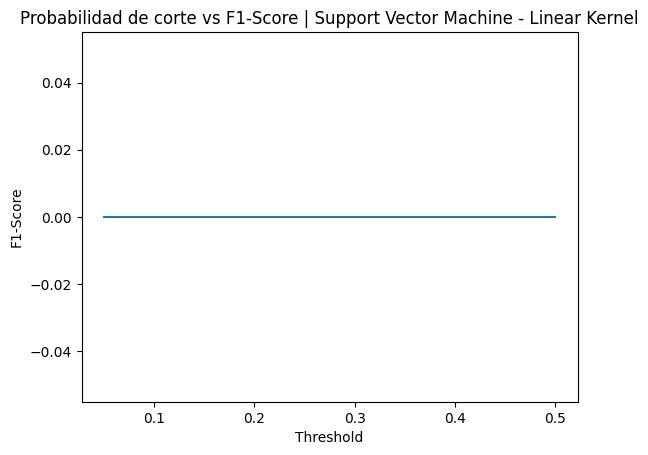

In [78]:
# Support Vector Machine - Linear Kernel
ax = sns.lineplot(thrld_svm_l_df, x='Threshold', y='F1-Score')
plt.title('Probabilidad de corte vs F1-Score | Support Vector Machine - Linear Kernel')
plt.show()

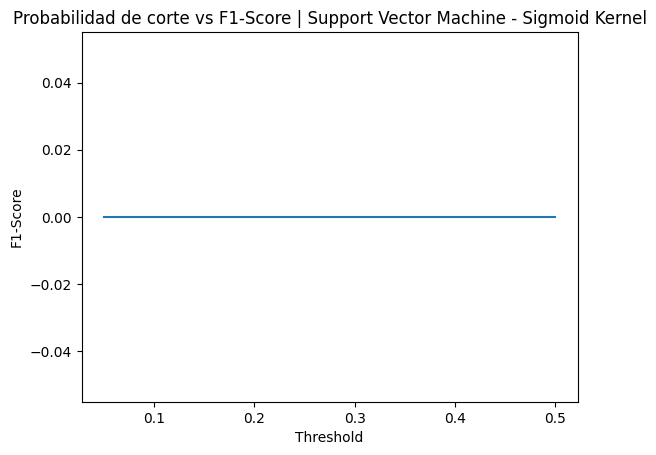

In [79]:
# Support Vector Machine - Sigmoid Kernel
ax = sns.lineplot(thrld_svm_g_df, x='Threshold', y='F1-Score')
plt.title('Probabilidad de corte vs F1-Score | Support Vector Machine - Sigmoid Kernel')
plt.show()

En este caso, el `F1-Score` siempre es 0 en probabilidad para los vectores de máquina de soportes.

##### Optimización de Hiperparámetros

Una vez obtenidas las probabilidades de corte, procedemos a optimizar los hiperparámetros de los modelos con los que contamos. Para lo anterior utilizaremos un método gráfico similar, en el que encontraremos el mejor ajuste de los datos, dado una configuración de parámetros pre entregados al modelo. **Esto falta completar!!**

# Ajuste de hiperparámetros
Teniendo los puntos óptimos de probabilidad de corte para Random Forest (0.25) y Decision Tree (0.15). Estos se usarán para ajustar la clasificación basada en las probabilidades de predicción proporcionadas por los modelos.

In [80]:
def adjust_prediction_by_prob(model, X, threshold):
    """Ajusta las predicciones basadas en una probabilidad de corte."""
    return (model.predict_proba(X)[:,1] >= threshold).astype(int)

Luego, vamos con la optimización de hiperparámetros:

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimización para Random Forest
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

best_rf = rf_grid_search.best_estimator_

# Optimización para Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt, dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

best_dt = dt_grid_search.best_estimator_

# Evaluar los modelos con los hiperparámetros óptimos usando la probabilidad de corte ajustada
rf_predictions = adjust_prediction_by_prob(best_rf, X_test, 0.25)
dt_predictions = adjust_prediction_by_prob(best_dt, X_test, 0.15)

rf_f1 = f1_score(y_test, rf_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print(f"F1-Score de Random Forest: {rf_f1}")
print(f"F1-Score de Decision Tree: {dt_f1}")

F1-Score de Random Forest: 0.1212121212121212
F1-Score de Decision Tree: 0.11129848229342328


### Calidad de ajuste en dataset de prueba

Observamos que, dada la optimización de hiperparámetros y el ajuste de probabilidad de corte, tenemos que el modelo `Random Forest` es el que tiene mejor calidad de ajuste. Observamos la calidad de ajuste del modelo y sus métricas.

Obtenemos los mejores hiperparámetros del modelo entrenado

In [84]:
rf_grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Calculamos la matriz de confusión y métricas para la predicción

In [99]:
display(confusion_matrix(y_test, rf_predictions))
display(f'Accuracy: {accuracy_score(y_test, rf_predictions)}')
display(f'Precision: {precision_score(y_test, rf_predictions)}')
display(f'Recall: {recall_score(y_test, rf_predictions)}')
display(f'F1-Score: {f1_score(y_test, rf_predictions)}')

array([[172050,    140],
       [   237,     26]])

'Accuracy: 0.997813897119795'

'Precision: 0.1566265060240964'

'Recall: 0.09885931558935361'

'F1-Score: 0.1212121212121212'

Como era de esperarse, podemos ver entonces que tenemos un alto `Accuracy` dado por la gran cantidad de casos en que predecimos bien el dato de la clase mayoritaria, por lo que el modelo generaliza bien para dicho caso pero no para el caso de la clase minoritaria. Dicho caso se puede ver por los valores de `Recall`, `Precision` y `F1-Score`, los cuales son muy bajos. En este caso, son excepcionalmente bajos dado que tenemos un desbalance demasiado acentuado, por lo que el valor de Falsos Negativos es muy acentuado. 

En particular, vemos que sólo se predice bien 26 casos de la clase minoritaria, siendo un total de 263, es decir un 10% de los casos.

Dado lo anterior, también podemos ver que no hemos caído en overfitting, debido a que los resultados del ajuste en el entrenamiento con Cross Validation no son excepcionalmente mejores que los del set de pruebas, sino que el problema radica principalmente en los casos en que la clase minoritaria no alcanza a ser predecida por el modelo.

### RESPUESTA 3 Análisis de Clustering sin considerar target

Realizaremos un análisis de clustering por medio de KMeans, en desmedro de utilizar Agrupamiento Jerárquico. Lo anterior es debido a que esta última técnica tiene un alto costo computacional en sus algoritmos, llegando a ser `O(n^3)` en algunos casos, por lo que al tener un dataset de 500.000 filas podríamos estar utilizando muchos recursos computacionales.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574841 entries, 0 to 2029432
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   pedestrians_injured            574841 non-null  int64
 1   cyclists_injured               574841 non-null  int64
 2   motorists_injured              574841 non-null  int64
 3   contribution_factor_vehicle_1  574841 non-null  int64
 4   contribution_factor_vehicle_2  574841 non-null  int64
 5   contribution_factor_vehicle_3  574841 non-null  int64
 6   tragedy                        574841 non-null  int64
 7   on_street_avenue               574841 non-null  int64
 8   cross_street_avenue            574841 non-null  int64
 9   off_street_avenue              574841 non-null  int64
 10  vehicle_type_1                 574841 non-null  int64
 11  vehicle_type_2                 574841 non-null  int64
 12  vehicle_type_3                 574841 non-null  int64
dty

Primero debemos estandarizar los datos, dado que utilizaremos un algoritmo de distancias

In [47]:
from sklearn.cluster import KMeans

Calculamos los clusters probando diferentes K y sin considerar la variable respuesta

In [65]:
predictors = df.columns.tolist()
predictors.remove('tragedy')
X = df[predictors]

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
inertias = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

Graficamos con el método del codo las inercias (suma de distancias de cada dato al centroide específico de su cluster) vs el `K`

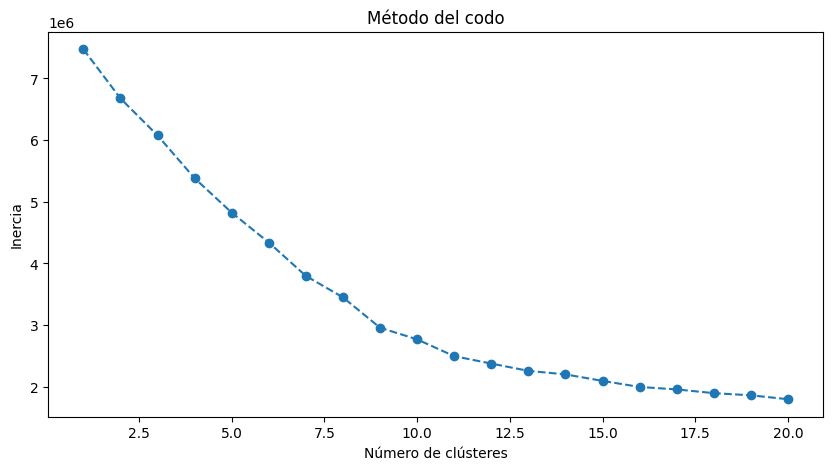

In [71]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 21), inertias, marker='o', linestyle='--')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

Podemos ver que si consideramos 11 clusters, la pendiente se empieza a relajar, por lo que gráficamente tomamos en consideración este punto. Ahora, realizamos

In [74]:

optimal_clusters = 11
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir la etiqueta de clúster al DataFrame
df['cluster'] = clusters
df.head()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,cluster
0,0,0,2,1,55,42,0,0,1,0,5,6,6,8
1,0,0,1,37,55,42,0,0,0,0,5,6,6,1
2,0,0,0,19,55,42,0,0,0,0,5,4,6,3
6,0,0,0,34,55,42,0,0,0,0,5,7,6,1
8,0,0,0,10,55,42,0,0,0,1,5,6,6,5


Ahora, buscaremos abordar graficar cada cluster por medio de PCA, a modo de poder observar gráficamente el desempeño de la agrupación

In [75]:
from sklearn.decomposition import PCA

Generamos dos componentes principales

In [76]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transform the data using the PCA components
transformed_data = pca.transform(X_scaled)

# Store the transformed data in a new dataframe
pca_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2'])

Le asignamos el cluster a cada dato y graficamos

In [88]:
pca_df['cluster'] = df.reset_index().drop('index', axis=1)['cluster']
pca_df.head()

,PC1,PC2,cluster
0,2.091351,0.278824,8
1,-0.592885,0.573779,1
2,-1.111874,0.171405,3
3,-0.979719,1.072898,1
4,0.609525,1.168395,5


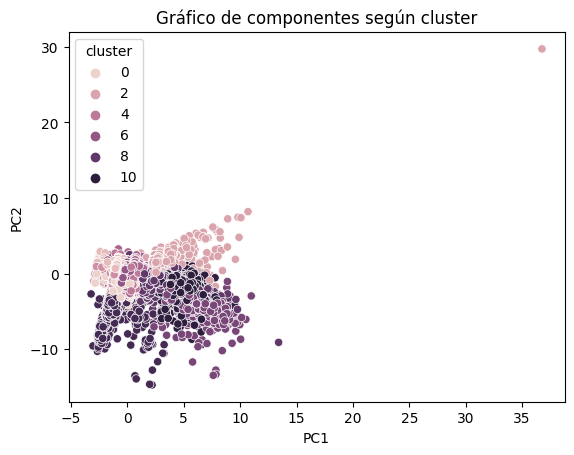

In [90]:
ax = sns.scatterplot(pca_df, x='PC1', y='PC2', hue='cluster')
ax.set_title('Gráfico de componentes según cluster')
plt.show()

Removemos outliers para obtener una visión mas detallada

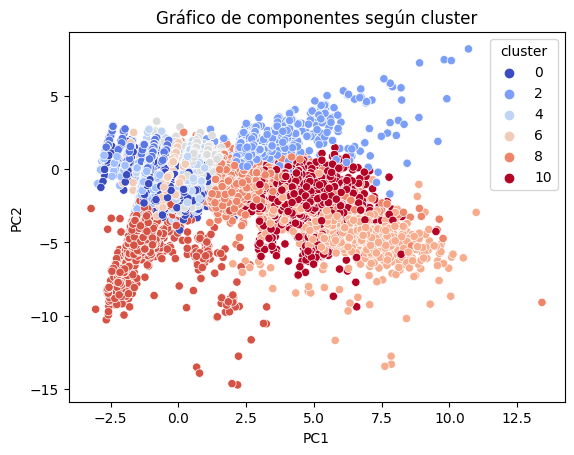

In [99]:
ax = sns.scatterplot(pca_df[pca_df.PC1 < 25], x='PC1', y='PC2', hue='cluster', palette='coolwarm')
ax.set_title('Gráfico de componentes según cluster')
plt.show()

Dado lo anterior, podemos ver que existe una clara separación entre los clusters `0`, `2` y los otros cluster. Ahora, observaremos la misma dispersión pero con respecto a nuestro target `tragedy`.

In [92]:
pca_df['tragedy'] = df.reset_index().drop('index', axis=1)['tragedy']
pca_df.head()

,PC1,PC2,cluster,tragedy
0,2.091351,0.278824,8,0
1,-0.592885,0.573779,1,0
2,-1.111874,0.171405,3,0
3,-0.979719,1.072898,1,0
4,0.609525,1.168395,5,0


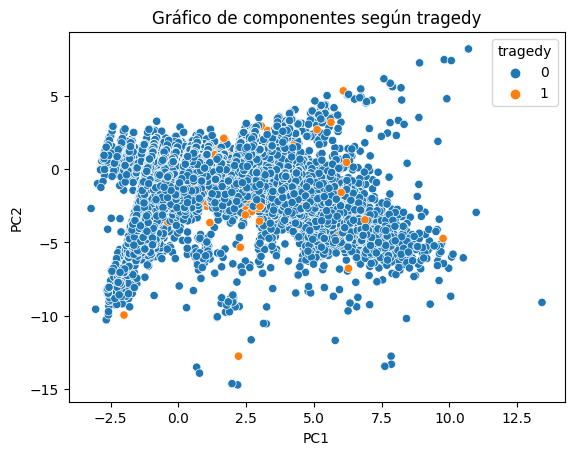

In [93]:
ax = sns.scatterplot(pca_df[pca_df.PC1 < 25], x='PC1', y='PC2', hue='tragedy')
ax.set_title('Gráfico de componentes según tragedy')
plt.show()

Podemos ver que no hay una separación clara entre si `tragedy` es 0 o 1, lo que también se puede reflejar en que la calidad de ajuste del modelo no es prolija, según hemos visto en las métricas del `F1-Score`. Dado lo anterior, quizás podría ser más aconsejable redefinir el target a modelar a modo de incluir otras variables.

Ahora, observamos algunos clúster más relevantes para ver si tenemos algunas diferencias significativas.

##### Cluster 0

In [96]:
cluster0_df = df[df.cluster == 0]
cluster0_df.describe()

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,cluster
count,48455.0,48455.0,48455.000000,48455.000000,48455.000000,48455.000000,48455.000000,48455.000000,48455.000000,48455.0,48455.000000,48455.000000,48455.000000,48455.0
mean,0.0,0.0,0.145455,17.558023,13.092024,41.995398,0.000557,0.309070,0.239026,0.0,4.935260,4.721102,6.002456,0.0
std,0.0,0.0,0.354430,13.680547,4.542645,0.204380,0.023599,0.462115,0.426493,0.0,0.938461,1.618574,0.060047,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.000000,0.0
25%,0.0,0.0,0.000000,9.000000,11.000000,42.000000,0.000000,0.000000,0.000000,0.0,5.000000,3.000000,6.000000,0.0
50%,0.0,0.0,0.000000,9.000000,11.000000,42.000000,0.000000,0.000000,0.000000,0.0,5.000000,6.000000,6.000000,0.0
75%,0.0,0.0,0.000000,30.000000,18.000000,42.000000,0.000000,1.000000,0.000000,0.0,5.000000,6.000000,6.000000,0.0
max,0.0,0.0,2.000000,57.000000,33.000000,43.000000,1.000000,1.000000,1.000000,0.0,7.000000,8.000000,8.000000,0.0


Vemos que en este clúster no tenemos datos de peatones o ciclistas heridos, así como tampoco accidentes en que se haya involucrado avenidas diferentes a las principales. Podemos decir entonces que principalmente este cluster tiene solo accidentes con motoristas lesionados y que hayan ocurrido en las avenidas del auto y la avenida que cruzaba dicha otra avenida.

##### Cluster 4

In [97]:
cluster4_df = df[df.cluster == 4]
cluster4_df.describe()

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,cluster
count,87810.0,87810.0,87810.000000,87810.000000,87810.000000,87810.000000,87810.000000,87810.000000,87810.0,87810.0,87810.00000,87810.000000,87810.000000,87810.0
mean,0.0,0.0,0.136727,23.162464,53.559720,41.997460,0.001720,0.247113,1.0,0.0,4.91887,4.856816,6.001811,4.0
std,0.0,0.0,0.343561,16.242222,5.222339,0.172486,0.041433,0.431336,0.0,0.0,1.02333,1.596015,0.053859,0.0
min,0.0,0.0,0.000000,0.000000,21.000000,28.000000,0.000000,0.000000,1.0,0.0,0.00000,0.000000,5.000000,4.0
25%,0.0,0.0,0.000000,9.000000,55.000000,42.000000,0.000000,0.000000,1.0,0.0,5.00000,3.000000,6.000000,4.0
50%,0.0,0.0,0.000000,19.000000,55.000000,42.000000,0.000000,0.000000,1.0,0.0,5.00000,6.000000,6.000000,4.0
75%,0.0,0.0,0.000000,35.000000,55.000000,42.000000,0.000000,0.000000,1.0,0.0,5.00000,6.000000,6.000000,4.0
max,0.0,0.0,1.000000,57.000000,59.000000,42.000000,1.000000,1.000000,1.0,0.0,7.00000,8.000000,8.000000,4.0


Este cluster es similar al cluster 0, sin embargo, dado que el promedio del target `tragedy` es mayor al otro clúster, podemos inferir que en este cluster hay mayor gravedad en cuanto a la fatalidad de los accidentes.

##### Cluster 6

In [98]:
cluster6_df = df[df.cluster == 6]
cluster6_df.describe()

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,cluster
count,87098.0,87098.0,87098.000000,87098.000000,87098.000000,87098.000000,87098.000000,87098.0,87098.0,87098.0,87098.000000,87098.000000,87098.000000,87098.0
mean,0.0,0.0,0.141151,23.576799,53.730889,41.998691,0.002113,1.0,0.0,0.0,4.901134,4.826219,6.001871,6.0
std,0.0,0.0,0.348180,16.452476,4.798362,0.116586,0.045914,0.0,0.0,0.0,0.997889,1.608314,0.054919,0.0
min,0.0,0.0,0.000000,0.000000,26.000000,29.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,5.000000,6.0
25%,0.0,0.0,0.000000,9.000000,55.000000,42.000000,0.000000,1.0,0.0,0.0,5.000000,3.000000,6.000000,6.0
50%,0.0,0.0,0.000000,18.000000,55.000000,42.000000,0.000000,1.0,0.0,0.0,5.000000,6.000000,6.000000,6.0
75%,0.0,0.0,0.000000,35.000000,55.000000,42.000000,0.000000,1.0,0.0,0.0,5.000000,6.000000,6.000000,6.0
max,0.0,0.0,1.000000,57.000000,58.000000,42.000000,1.000000,1.0,0.0,0.0,7.000000,8.000000,8.000000,6.0


Este cluster se diferencia de los anteriores en que vemos un mayor promedio de accidentes con tragedia ocurrida, pero lo más llamativo es que solo se ven accidentes en la avenida principal, no así involucradas otras avenidas aledañas.

##### Cluster 8

In [100]:
cluster8_df = df[df.cluster == 8]
cluster8_df.describe()

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,cluster
count,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.000000,26795.0
mean,0.001008,0.000112,2.583766,23.986229,48.276581,41.984736,0.003769,0.324874,0.234820,0.015675,4.925844,4.900690,5.987236,8.0
std,0.031728,0.010581,1.048548,17.283603,14.670572,0.395483,0.061280,0.468337,0.423894,0.124215,0.716145,1.517074,0.258298,0.0
min,0.000000,0.000000,1.000000,0.000000,2.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.0
25%,0.000000,0.000000,2.000000,9.000000,55.000000,42.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,6.000000,8.0
50%,0.000000,0.000000,2.000000,19.000000,55.000000,42.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,6.000000,8.0
75%,0.000000,0.000000,3.000000,40.000000,55.000000,42.000000,0.000000,1.000000,0.000000,0.000000,5.000000,6.000000,6.000000,8.0
max,1.000000,1.000000,21.000000,57.000000,59.000000,43.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,8.000000,8.0


En este cluster podemos ver que hay accidentes de aún mayor gravedad, ya que se ven accidentes que involucran heridos tanto en peatones, ciclistas y motoristas, lo cual se condice con que la tasa de muertes que hay es mayor que en los clusters anteriores. Por otra parte, también se ve que hay accidentes en los tres tipos de avenidas involucradas.

##### Cluster 10

In [101]:
cluster10_df = df[df.cluster == 10]
cluster10_df.describe()

,pedestrians_injured,cyclists_injured,motorists_injured,contribution_factor_vehicle_1,contribution_factor_vehicle_2,contribution_factor_vehicle_3,tragedy,on_street_avenue,cross_street_avenue,off_street_avenue,vehicle_type_1,vehicle_type_2,vehicle_type_3,cluster
count,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.000000,18312.0
mean,0.006062,0.010321,0.651813,22.156892,49.289919,41.906018,0.004642,0.235583,0.180100,0.090979,4.931630,4.374399,3.011522,10.0
std,0.078322,0.101070,1.025691,16.913566,13.473133,1.019210,0.067974,0.424374,0.384282,0.287587,0.870778,1.551355,0.353221,0.0
min,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.0
25%,0.000000,0.000000,0.000000,9.000000,55.000000,42.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,3.000000,10.0
50%,0.000000,0.000000,0.000000,17.000000,55.000000,42.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,3.000000,10.0
75%,0.000000,0.000000,1.000000,35.000000,55.000000,42.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.000000,10.0
max,2.000000,1.000000,7.000000,56.000000,58.000000,43.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.000000,10.0


Vemos que la tasa de muertes es aún mayor que en todos los demás, por lo que podemos concluir que mientras mayor sea el clúster en número, mayor es la gravedad de los accidentes. Similar al cluster 8, en este clúster hay accidentes que afectaron los tres tipos de avenida, además de existir accidentes con heridos en cuanto a peatones, motoristas y ciclistas.